# Proyek Pertama Klasifikasi Gender Berdasarkan Namanya

# Data Diri
### **Nama** : 
Lutfi Fajri Akbar
### **No. Register** :
1494037162101-2551
### **Username Dicoding**:
lutfifajri02
### **E-mail**:
ltfffajri@gmail.com

# Codelab

In [76]:
import pandas as pd
df = pd.read_csv('/content/indonesian-names-people.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2230 non-null   object
 1   gender  2230 non-null   object
dtypes: object(2)
memory usage: 35.0+ KB


In [78]:
df.head(10)

,name,gender
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
5,jufianto henri,m
6,aan nuraini,f
7,abdur rahman,m
8,abdurrahman,m
9,ade indra sukma,f


In [79]:
df['gender'].replace(['m', 'f'], [0,1], inplace=True)
df.head(20)

,name,gender
0,hafizhan shidqi,0
1,gandhi wibowo,0
2,aldio mahendra purwandrarto,0
3,benny putra,0
4,vicky vernando dasta,0
5,jufianto henri,0
6,aan nuraini,1
7,abdur rahman,0
8,abdurrahman,0
9,ade indra sukma,1


In [80]:
nama_orang = df['name'].values
label = df['gender'].values

In [81]:
nama_orang

array(['hafizhan shidqi', 'gandhi wibowo', 'aldio mahendra purwandrarto',
       ..., 'andre marcellino', 'muhammad fahmi', 'arie untung'],
      dtype=object)

In [82]:
label

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(nama_orang, label, test_size=0.2)

In [84]:
len(x_train)

1784

In [85]:
len(x_test)

446

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 5000, oov_token = 'x')
tokenizer.fit_on_texts(x_train)                    

In [87]:
word_index = tokenizer.word_index
print(word_index)

{'x': 1, 'muhammad': 2, 'nur': 3, 'siti': 4, 'dwi': 5, 'ahmad': 6, 'putri': 7, 'm': 8, 'putra': 9, 'tri': 10, 'ayu': 11, 'dewi': 12, 'kurniawan': 13, 'sari': 14, 'lestari': 15, 'sri': 16, 'saputra': 17, 'maulana': 18, 'al': 19, 'pratama': 20, 'eka': 21, 'setiawan': 22, 'hidayat': 23, 'abdul': 24, 'rizki': 25, 'nurul': 26, 'ningsih': 27, 'rahman': 28, 'akbar': 29, 'ali': 30, 'wahyu': 31, 'adi': 32, 'aulia': 33, 'desi': 34, 'susanti': 35, 'ramadhan': 36, 'astuti': 37, 'fitri': 38, 'muhamad': 39, 'wahyudi': 40, 'hasanah': 41, 'reza': 42, 'wati': 43, 'imam': 44, 'indra': 45, 'joko': 46, 'yanti': 47, 'wulandari': 48, 's': 49, 'ade': 50, 'slamet': 51, 'sumarno': 52, 'rahma': 53, 'hadi': 54, 'mawarni': 55, 'bagus': 56, 'indah': 57, 'rahmat': 58, 'arya': 59, 'dedi': 60, 'aldi': 61, 'supri': 62, 'safitri': 63, 'susanto': 64, 'rizky': 65, 'eko': 66, 'efendi': 67, 'wibowo': 68, 'hermawan': 69, 'dian': 70, 'agus': 71, 'fitria': 72, 'yuliani': 73, 'steven': 74, 'ridho': 75, 'fajri': 76, 'andre': 77

In [88]:
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [89]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_train = pad_sequences(sequence_train,
                             padding='post',
                             maxlen=4,
                             truncating='post')

padded_test = pad_sequences(sequence_test,
                            padding='post',
                            maxlen=4,
                            truncating='post')

In [90]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [91]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          160000    
                                                                 
 lstm_12 (LSTM)              (None, 64)                24832     
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 189,057
Trainable params: 189,057
Non-tr

In [92]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [93]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi model telah mencapai >99%")
      self.model.stop_training = True

callback_model = myCallback()      

In [94]:
riwayat_model = model.fit(padded_train, y_train,
                          epochs = 10,
                          validation_data = (padded_test, y_test),
                          callbacks=[callback_model],
                          verbose=2)

Epoch 1/10
56/56 - 4s - loss: 0.6876 - accuracy: 0.5572 - val_loss: 0.6829 - val_accuracy: 0.5471 - 4s/epoch - 78ms/step
Epoch 2/10
56/56 - 1s - loss: 0.5126 - accuracy: 0.7231 - val_loss: 0.4097 - val_accuracy: 0.7937 - 522ms/epoch - 9ms/step
Epoch 3/10
56/56 - 1s - loss: 0.0950 - accuracy: 0.9725 - val_loss: 0.4970 - val_accuracy: 0.7982 - 507ms/epoch - 9ms/step
Epoch 4/10

Akurasi model telah mencapai >99%
56/56 - 1s - loss: 0.0352 - accuracy: 0.9944 - val_loss: 0.5160 - val_accuracy: 0.7937 - 505ms/epoch - 9ms/step


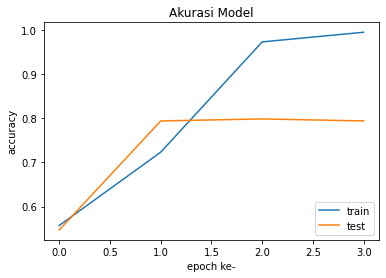

In [95]:
# Membuat plot akurasi dari model

import matplotlib.pyplot as plt

plt.plot(riwayat_model.history['accuracy'])
plt.plot(riwayat_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch ke-')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

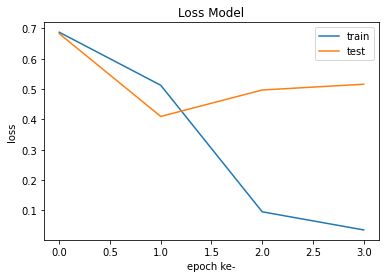

In [96]:
# Membuat plot loss dari model

import matplotlib.pyplot as plt

plt.plot(riwayat_model.history['loss'])
plt.plot(riwayat_model.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch ke-')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()